## In this project, we will use python to analyze data from Uber
## We will use python to get the following insights:
### -Check how long people travel with Uber
### -What hour do most people take Uber to their destination?
### -Check the purpose of the various trips taken
### -Which day has the highest number  of trips
### -What are the number of trips taken daily?
### -Classify the various months so we can see the months in which people book the most.
### -From what location do people book for Ubers the most?

# importing the necessary libraries

In [27]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import calendar

# importing and reading the csv files

In [28]:
data= pd.read_csv(r"C:\Users\NERVILLE\Desktop\UBER analysis py\Uber Drives - .csv")
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Checking for missing values

In [29]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [30]:
#checking for the number of missing values in each column
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [31]:
#dropping all NaN VALUES
data = data.dropna()
#replacing missing values with a number or string using the code..... df.fillna(value=0)
#filling missing values with the previous values .....df.fillna(method='pad')
#... next values .....df.fillna(method='bfill')
#... previous values row wise .....df.fillna(method='pad', axis=1)
#... the next values row wise .....df.fillna(method='bfill', axis=1)
#filling different null values in different columns .....df.fillna({'START_DATE*':'abcd','CATEGORY*':'abcd'})
#filling numerical missing values with the mean of the entire column .....data.fillna(method=data['MILES*'].mean())




In [33]:
#verifying if they were successfully removed
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [34]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

# converting the date data types to date

In [35]:
#converting the date data types to date
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format= '%m/%d/%Y  %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format= '%m/%d/%Y  %H:%M')
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [36]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [51]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
   #creating new columns for the hour, day, month, etc from the list derived above 


In [52]:
 
    data['HOUR'] = hour
    data['DAY'] = day
    data['DAY OF WEEK'] = dayofweek
    data['MONTH'] = month
    data['WEEKDAY'] = weekday
    data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


# checking the various categories we have

In [55]:
data['CATEGORY*'].value_counts()

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64

# visualising the categories using seaborn

<Axes: xlabel='CATEGORY*', ylabel='count'>

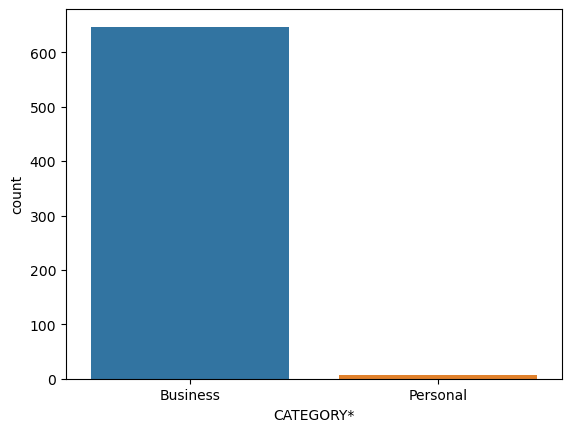

In [56]:
sns.countplot(x='CATEGORY*', data=data)

# analysing the distances people cover with Ubers

<Axes: ylabel='Frequency'>

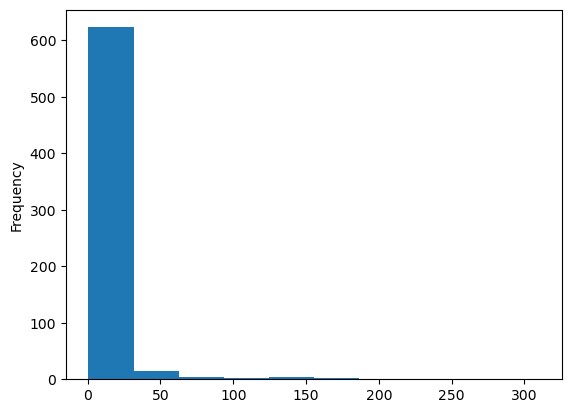

In [57]:
data['MILES*'].plot.hist()

# what hour do most people take uber to their destination?

Text(0.5, 1.0, 'Number of trips VS hours')

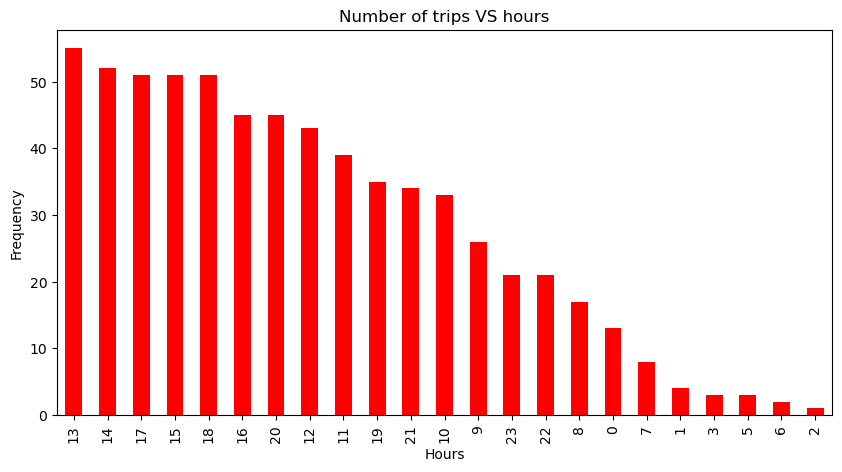

In [59]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind = 'bar', color = 'red', figsize = (10,5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips VS hours')

#The bar chart shows that most people prefer to book the Uber at 13h 

# Check the purpose of trips

<Axes: xlabel='PURPOSE*'>

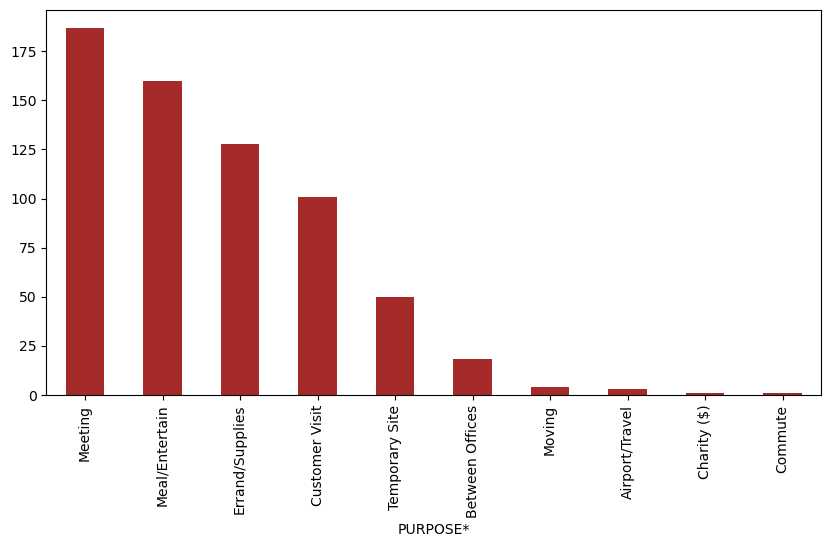

In [60]:
data['PURPOSE*'].value_counts().plot(kind='bar', figsize = (10,5), color= 'brown')


# Checking which day has the highest number of trips

<Axes: xlabel='WEEKDAY'>

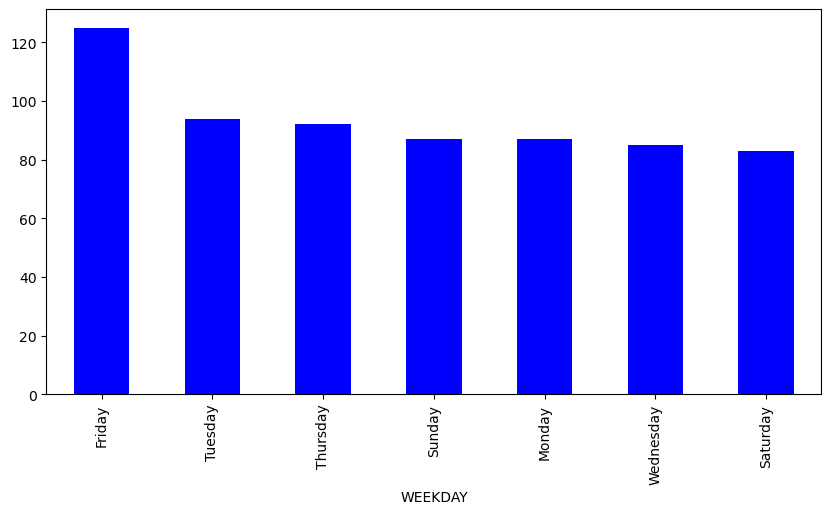

In [62]:
data['WEEKDAY'].value_counts().plot(kind='bar', figsize = (10,5), color= 'blue')

# How many trips do people take each day

<Axes: xlabel='DAY'>

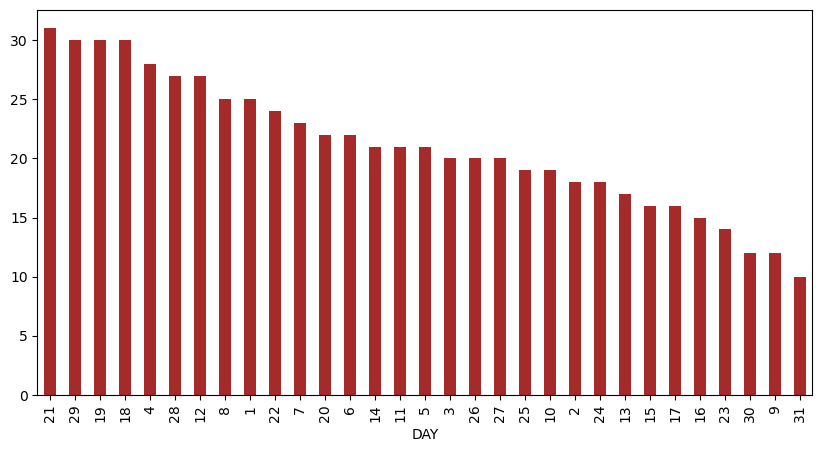

In [64]:
 data['DAY'].value_counts().plot(kind='bar', figsize = (10,5), color= 'brown')

# Classifying the number of bookings per month

<Axes: xlabel='MONTH'>

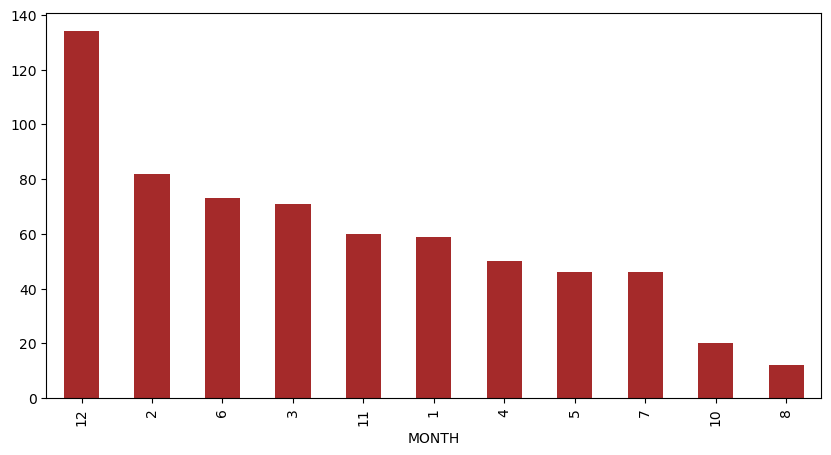

In [65]:
data['MONTH'].value_counts().plot(kind='bar', figsize = (10,5), color= 'brown')

# From what location do people book for Ubers the most?

<Axes: xlabel='START*'>

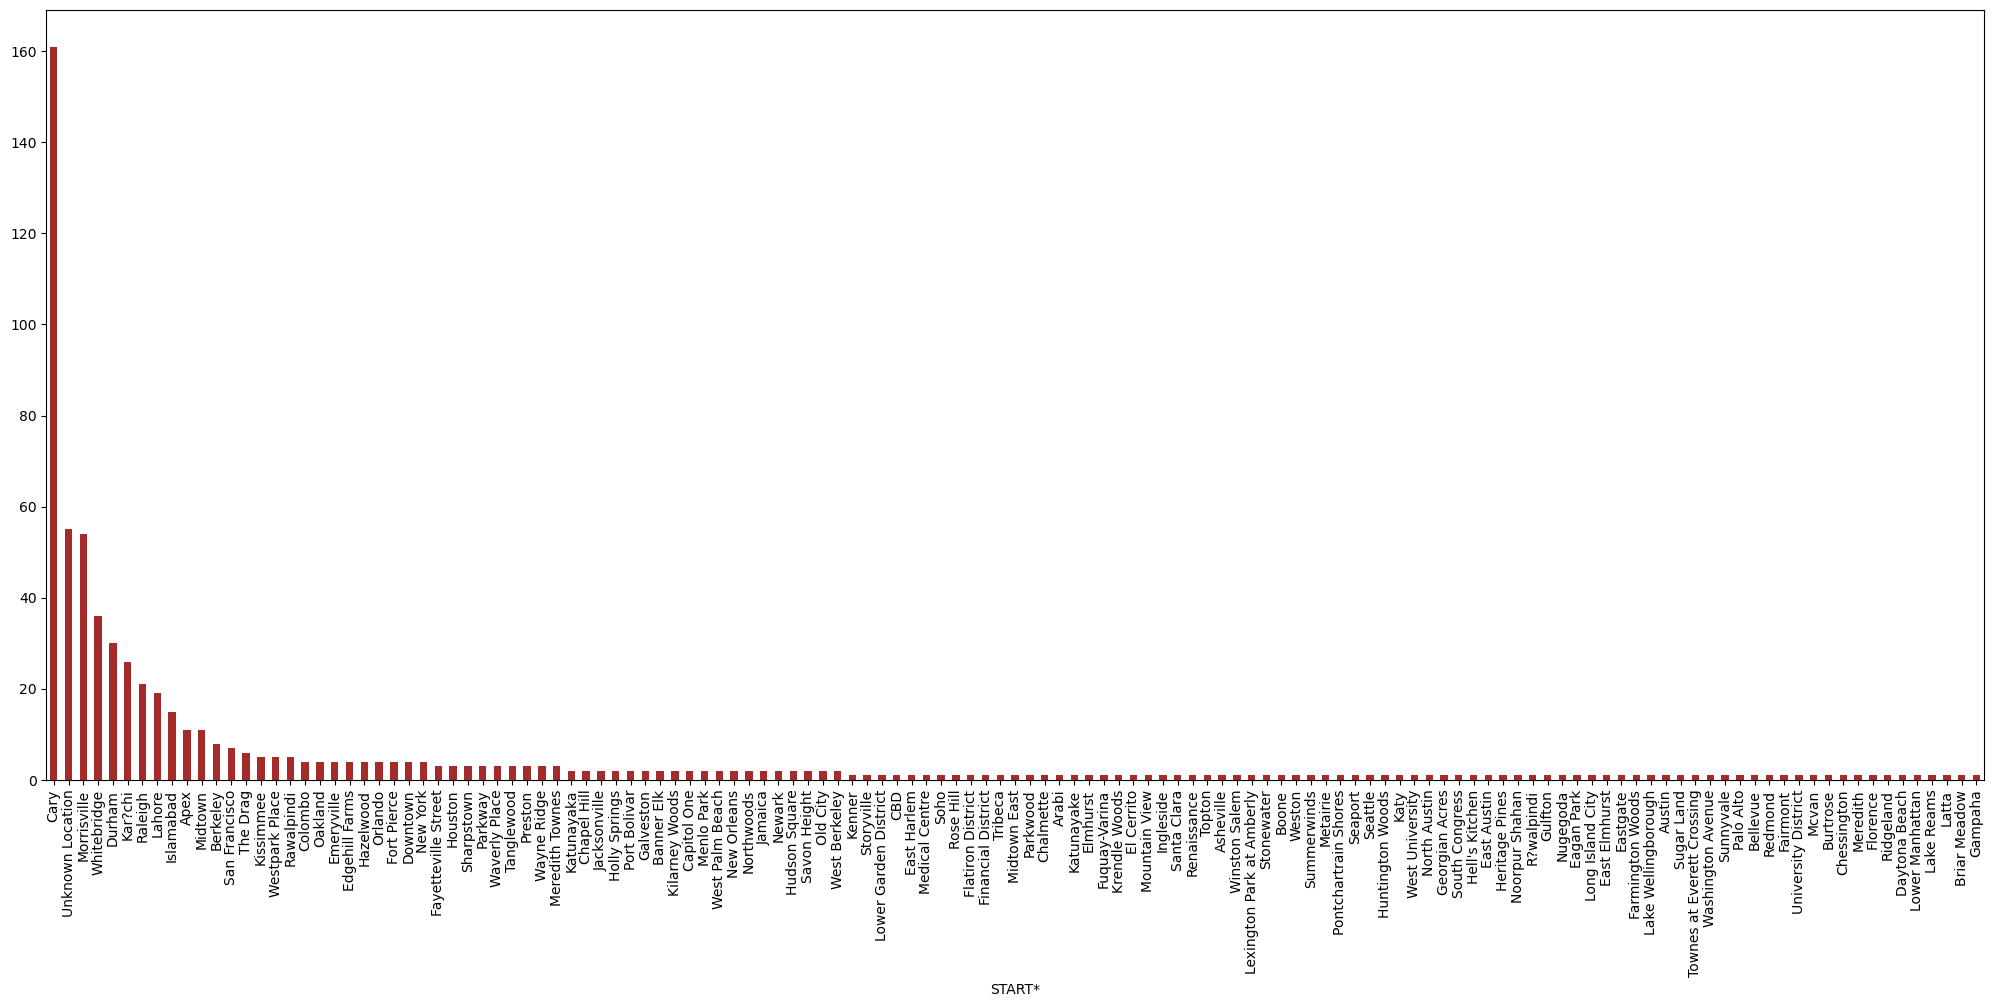

In [68]:
data['START*'].value_counts().plot(kind='bar', figsize = (25,10), color= 'brown')